In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = fetch_california_housing()

In [5]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [7]:
# convert into a dataset
dataset = pd.DataFrame(df.data)
print(dataset.head())

        0     1         2         3       4         5      6       7
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25


In [8]:
dataset.columns = df.feature_names


In [9]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
### now we the dependent features for this we have the target
df.target.shape

(20640,)

In [11]:
# now making new columns naming Price and give the the above dependent values
dataset["Price"] = df.target


In [12]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
## Now divide into dependent and independent features

X = dataset.iloc[:,:-1]  # independent features
y = dataset.iloc[:,-1]

#### Linear Regression 

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor = LinearRegression()

mse = cross_val_score(lin_regressor, X,y, scoring = 'neg_mean_squared_error', cv= 5)
mean_mse = np.mean(mse)
print(mean_mse)

-0.5582901717686564


Now implementing the same thing with Ridege  and lasso regression

### Ridge Regression

In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV # grid search cv is used for lambda that is present in math part

ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2, 1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv = 5)
ridge_regressor.fit(X,y)



GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [17]:
print(ridge_regressor.best_params_) ## this show that which lamda value is situable
print(ridge_regressor.best_score_) ## this will give us the mean squar error

{'alpha': 55}
-0.5579444917053025


In [19]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV # grid search cv is used for lambda that is present in math part

lasso = Lasso()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2, 1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso, parameters,scoring='neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X,y)

c:\Users\azhar afridi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.201e+03, tolerance: 2.228e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\azhar afridi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.818e+03, tolerance: 2.256e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\azhar afridi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [20]:
print(lasso_regressor.best_params_) ## to show the best value
print(lasso_regressor.best_score_) ## to show the mean squared error

{'alpha': 0.001}
-0.5582759293868985


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)


In [23]:
prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)

c:\Users\azhar afridi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


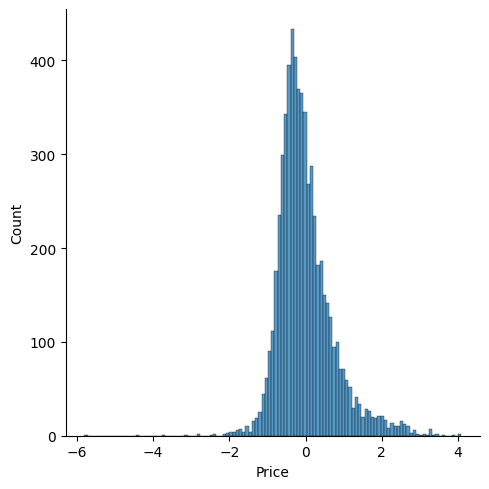

In [24]:
import seaborn as sns
sns.displot(y_test-prediction_lasso)

c:\Users\azhar afridi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


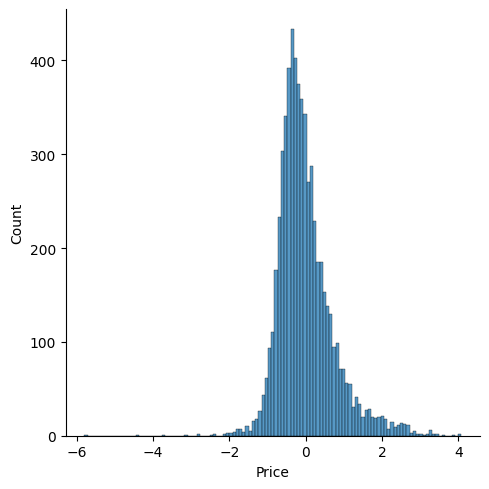

In [25]:
## prediction for ridge regression
sns.displot(y_test-prediction_ridge)